# Machine Learning Final Examination

Student name: Ciniso Msibi

Registration Number: MAY22/COMP/1423X

In [336]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [337]:
ebola_data = 'https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease'
page = requests.get(ebola_data)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [338]:
tr_elements = doc.xpath('//tr')
col = []
i = 0

for t in tr_elements[0]:
    i+=1
    name = t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Year
2:Country
3:EVD
4:Cases
5:Deaths
6:Case fatality 


In [339]:
for j in range(1,len(tr_elements)):
    T = tr_elements[j]
    
    if len(T)!=6:
        break
        
    i = 0
    
    for t in T.iterchildren():
        data = t.text_content()
        col[i][1].append(data)
        
        i+= 1

In [340]:
[len(C) for (title,C) in col]

[41, 41, 41, 41, 41, 41]

In [341]:
Dict = {title:column for(title,column) in col}
df = pd.DataFrame(Dict)

In [342]:
df.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42%
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66%
4,2018,Democratic Republic of the Congo,Zaire,54,33,61%


In [343]:
df.tail()

,Year,Country,EVD,Cases,Deaths,Case fatality
36,1994,Gabon,Zaire,52,31,60%
37,1979,Sudan,Sudan,34,22,65%
38,1977,Democratic Republic of the Congo,Zaire,1,1,100%
39,1976,Sudan,Sudan,284,151,53%
40,1976,Democratic Republic of the Congo,Zaire,318,280,88%


In [344]:
df.shape

(41, 6)

In [345]:
df['Year'] = df['Year'].str.replace(r"\(.*\)","")
df.iloc[:,5] =df.iloc[:,5].str.replace(r"%","")

C:\Users\Virus Msibi\AppData\Local\Temp\ipykernel_8048\1938617294.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'] = df['Year'].str.replace(r"\(.*\)","")


In [346]:
df1 = df.drop(['Country','Year'], axis=1)
df1.columns = df1.columns.str.replace('Case fatality', 'Case_Fatality')
df1.head()

,EVD,Cases,Deaths,Case_Fatality
0,Zaire,Ongoing,,
1,Zaire,Ongoing,,
2,Zaire,130,55,42
3,Zaire,3481,2299,66
4,Zaire,54,33,61


In [347]:
data = df1.drop(columns=df1.columns[3])

In [348]:
data = data.drop(labels=[0,1,3,13,14,15,16,26,27,32,33], axis=0)

In [349]:
data.dtypes

EVD       object
Cases     object
Deaths    object
dtype: object

In [350]:
data["Cases"] = data['Cases'].astype('int')

In [351]:
data["Deaths"] = data['Deaths'].astype('int')

In [352]:
data.corr()

,Cases,Deaths
Cases,1.000000,0.955801
Deaths,0.955801,1.000000


In [353]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [354]:
lx = data[['Cases']]
ly = data['Deaths']

X_train,X_test,y_train,y_test = train_test_split(lx,ly,test_size=0.2)

clf = LinearRegression()

In [355]:
#training the model
clf.fit(lx,ly)

LinearRegression()

In [356]:
ly1 = clf.predict(lx)

The slope of line is 0.6557362641247445.
The y intercept is -2.1452425212216997.
The best fit simple linear regression line is 0.6557362641247445x + -2.1452425212216997.


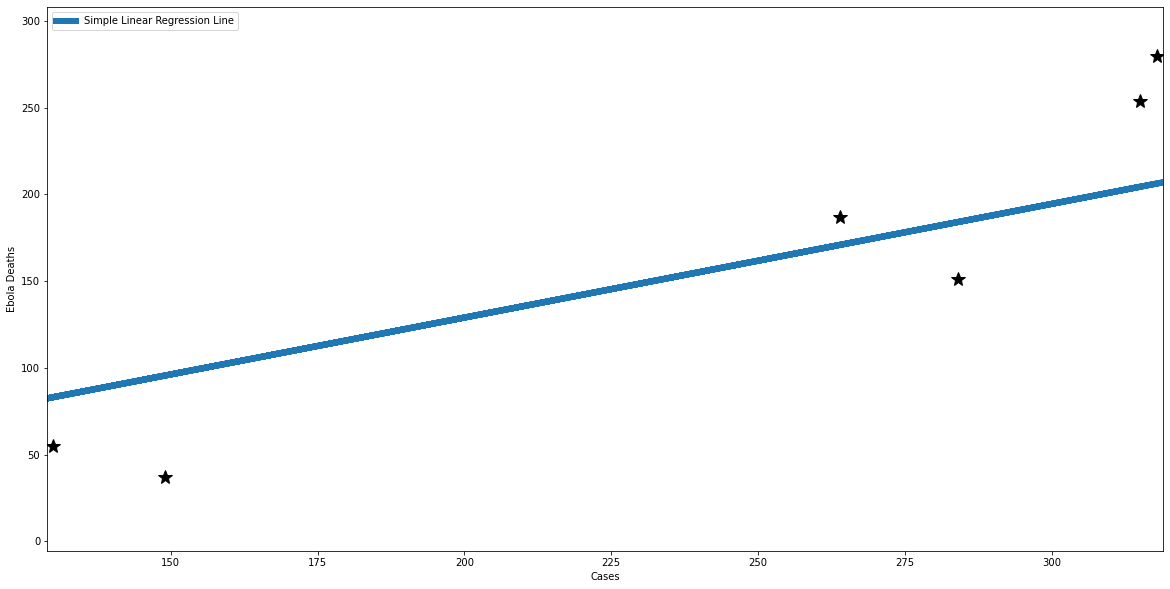

In [357]:
plt.figure(figsize = (20,10))

order = 1

x = data.Cases
y = data.Deaths

m, b = np.polyfit(x,y,order)

plt.plot(x, y,'*k', markersize = 15, label ='')
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 6)

print ('The slope of line is {}.'.format(m))
print ('The y intercept is {}.'.format(b))
print ('The best fit simple linear regression line is {}x + {}.'.format(m,b))


#Increase sligthly the axis sizes to make the plot more clear
plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1, y.iloc[-1]*1.1])

# Add axis labels
plt.xlabel('Cases')
plt.ylabel('Ebola Deaths')
plt.legend(loc = 'upper left')


# Increase default font size
plt.rcParams.update({'font.size': 26})
plt.show()

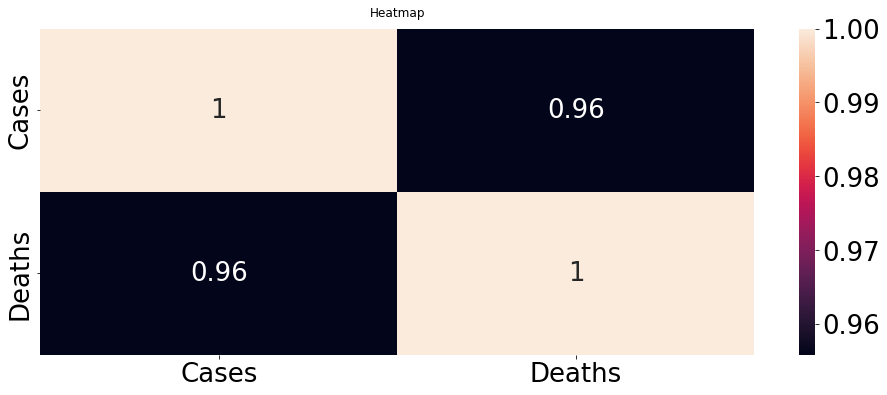

In [358]:
import seaborn as sns
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(method ='pearson'), annot=True)
heatmap.set_title('Heatmap', fontdict={'fontsize':12}, pad=12);

In [359]:
from sklearn.metrics import r2_score


In [360]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(ly,ly1)

0.9135548886383683

In [361]:
mean_squared_error(lx,ly1)

2454.081452445397

The model is 91 percent accurate

# Section B

## Question 3

In [362]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from six import StringIO
import six
import sys
sys.modules['externals.six'] = six
#from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

In [363]:
EmptyTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

In [364]:
X =data[["Deaths","Cases"]].values
X[0:4]

array([[ 55, 130],
       [ 33,  54],
       [  4,   8],
       [  0,   1]])

In [365]:
y =data["EVD"].values
y[0:4]

array(['Zaire', 'Zaire\xa0 ', 'Zaire\xa0 ', 'Zaire '], dtype=object)

In [366]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.3, random_state=3)

In [367]:
EmptyTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [368]:
RealTree =EmptyTree.predict(X_trainset)

In [370]:
print(RealTree [0:4])
print(y_trainset [0:4])

['Zaire\xa0 ' 'Zaire ' 'Zaire ' 'Zaire ']
['Zaire\xa0 ' 'Zaire ' 'Zaire ' 'Zaire ']


In [371]:
dot_data = StringIO()
filename = "Ebola.png"
featureNames = data.columns[0:4]
targetNames = data["EVD"].unique().tolist()
out=tree.export_graphviz(RealTree,feature_names=featureNames,out_file=dot_data, class_names= np.unique(y_trainset), filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

TypeError: ['Zaire\xa0 ' 'Zaire ' 'Zaire ' 'Zaire ' 'Sudan ' 'Zaire ' 'Zaire '
 'Zaire ' 'Zaire ' 'Zaire ' 'Sudan ' 'Zaire ' 'Zaire ' 'Sudan ' 'Zaire'
 'Zaire ' 'Sudan ' 'Zaire ' 'Sudan ' 'Zaire ' 'Bundibugyo '] is not an estimator instance.

In [372]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [373]:
yhat_tree=RealTree.predict(X)
yhat_tree_loss=RealTree.predict_proba(X_testset)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_log_test=metrics.log_loss(y_testset, yhat_tree_loss)
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test , " the Log Loss is ",tree_log_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

## Question 4

In [375]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm


KeyError: 'Clump'

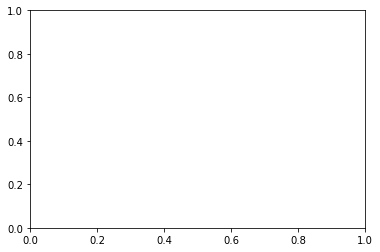

In [377]:
ax = data[data['Cases'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant');
data[data['Cases'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax);

xfit = np.linspace(0, 10)
plt.plot(xfit,xfit)
plt.fill_between(xfit,xfit,
                alpha=0)
plt.xlim(0, 10);
plt.title('SVM')
plt.show()

In [379]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (24, 2) (24,)
Test set: (6, 2) (6,)


In [380]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [381]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train)
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2, average='weighted'))

Avg F1-score: 0.2667
Jaccard score: 0.2222


## Question 5

In [374]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools